In [57]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import spearmanr
from scipy.stats import mannwhitneyu
from scipy.stats import pearsonr
from scipy.stats import kruskal
from scipy.stats import shapiro
from scipy.stats import boxcox ,yeojohnson,zscore
from sklearn.preprocessing import MinMaxScaler


In [58]:
shipment_data = pd.read_csv(r"C:\Users\sneha.priya\OneDrive - WiseTech Global Pty Ltd\Desktop\DS\VDT model\DS Interview Assignment\DS Interview Assignment\Data for Assignment 1\csv_files\data1_shipments.csv")
# vessel_data = pd.read_csv(r"C:\Users\sneha.priya\Downloads\DS Interview Assignment\DS Interview Assignment\Data for Assignment 1\data2_vessel.csv")
# ports_data = pd.read_csv(r"C:\Users\sneha.priya\Downloads\DS Interview Assignment\DS Interview Assignment\Data for Assignment 1\data3_ports.csv")

In [59]:
shipment_data.head()

,SHIPMENTID,VESSEL,IMO,VOYAGE#,ORIGIN_PORT,DESTINATION_PORT,ARRIVAL_TIME,GATEOUT_TIME,EQUIPMENTTYPECODE,HAZMAT,GROSS_WEIGHT,weight_uom
0,1,BELLAVIA,9290440,003E,NAGOYA,TACOMA,28-08-2019 06:30,29-08-2019 13:11,UCU,N,NaN,NaN
1,13,BELLAVIA,9290440,003E,TOKYO,TACOMA,28-08-2019 06:30,30-08-2019 14:30,UCU,N,NaN,NaN
2,1079,SOUTHAMPTON EXPRESS,9447885,002E,HONG KONG,NEW YORK,22-09-2019 10:48,26-09-2019 06:55,UCU,N,NaN,NaN
3,1080,SOUTHAMPTON EXPRESS,9447885,002E,HONG KONG,NEW YORK,22-09-2019 10:48,25-09-2019 11:47,UCU,N,NaN,NaN
4,1149,MOL MOTIVATOR,9475624,048E,SHANGHAI,CHARLESTON,24-09-2019 02:25,25-09-2019 16:21,UCU,N,NaN,NaN


Shipment Data Analysis

In [60]:
shipment_data.columns

Index(['SHIPMENTID', 'VESSEL', 'IMO', 'VOYAGE#', 'ORIGIN_PORT',
       'DESTINATION_PORT', 'ARRIVAL_TIME', 'GATEOUT_TIME', 'EQUIPMENTTYPECODE',
       'HAZMAT', 'GROSS_WEIGHT', 'weight_uom'],
      dtype='object')

In [61]:
shipment_data['EQUIPMENTTYPECODE'].value_counts()

40ST    358
40HC    315
20ST    133
UCU     106
45G0     23
40RF     10
42G0     10
LCL       7
40OT      7
40HR      5
20FR      4
40HQ      4
LCL7      3
45HC      2
22G0      1
20RF      1
45HQ      1
Name: EQUIPMENTTYPECODE, dtype: int64

In [62]:
shipment_data['ARRIVAL_TIME'] = pd.to_datetime(shipment_data['ARRIVAL_TIME'],dayfirst=True)
shipment_data['GATEOUT_TIME'] = pd.to_datetime(shipment_data['GATEOUT_TIME'],dayfirst=True)

In [63]:
shipment_data['IMPORT_DWELL'] = (shipment_data['GATEOUT_TIME'] - shipment_data['ARRIVAL_TIME']).dt.total_seconds() / 3600
shipment_data['IMPORT_DWELL']

0      30.683333
1      56.000000
2      92.116667
3      72.983333
4      37.933333
         ...    
989    49.316667
990    38.383333
991    62.100000
992    20.433333
993    19.400000
Name: IMPORT_DWELL, Length: 994, dtype: float64

In [64]:
shipment_data.isna().sum()

SHIPMENTID             0
VESSEL                 0
IMO                    0
VOYAGE#                0
ORIGIN_PORT            0
DESTINATION_PORT       0
ARRIVAL_TIME           0
GATEOUT_TIME           0
EQUIPMENTTYPECODE      4
HAZMAT               202
GROSS_WEIGHT         668
weight_uom           668
IMPORT_DWELL           0
dtype: int64

In [65]:
shipment_data['IMPORT_DWELL'].describe()

count     994.000000
mean      117.951844
std        88.208921
min        -0.333333
25%        62.691667
50%       104.683333
75%       152.045833
max      1035.950000
Name: IMPORT_DWELL, dtype: float64

In [66]:
len(shipment_data[shipment_data['IMPORT_DWELL']<0])

1

In [67]:
shipment_df = shipment_data[shipment_data['IMPORT_DWELL']>=0].copy()
shipment_df.reset_index(drop=True,inplace=True)

In [68]:
shipment_df['IMPORT_DWELL'].describe()

count     993.000000
mean      118.070963
std        88.173345
min         3.766667
25%        62.816667
50%       104.733333
75%       152.316667
max      1035.950000
Name: IMPORT_DWELL, dtype: float64

In [69]:
# Shapiro–Wilk test normality test for subset of dwell
stat, p = shapiro(shipment_data['IMPORT_DWELL'])
print(stat,p)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Data follows Normal Distribution (Accept H0)')
else:
    print('Data does not follow Normal Distribution (Reject H0)')

0.7778002023696899 1.164810897965488e-34
Statistics=0.778, p=0.000
Data does not follow Normal Distribution (Reject H0)


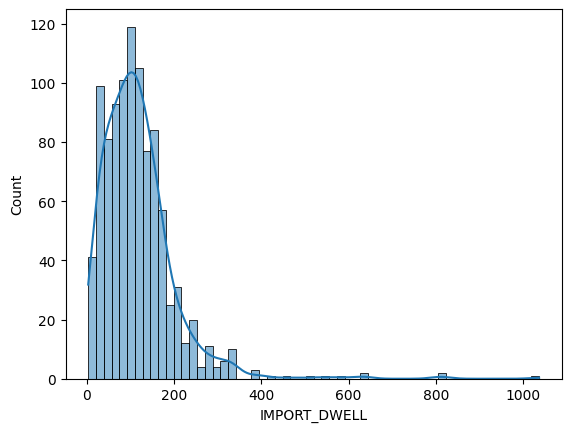

In [70]:
sns.histplot(shipment_df['IMPORT_DWELL'],kde = True)
plt.show()

In [71]:
target_variable = shipment_df[['IMPORT_DWELL']]

# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Applying Min-Max scaling
shipment_df['IMPORT_DWELL_MINMAX'] = scaler.fit_transform(target_variable)

In [72]:
shipment_df['LOG_TRANSFORM'] = np.log(shipment_df['IMPORT_DWELL'])
shipment_df['SQRT_TRANSFORM'] = np.sqrt(shipment_df['IMPORT_DWELL'])
shipment_df['IMPORT_DWELL_SCALED'], best_lambda = boxcox(shipment_df['IMPORT_DWELL'])
shipment_df['YEOJOHNSON_TRANSFORM'], _ = yeojohnson(shipment_df['IMPORT_DWELL'])
shipment_df['Z_Score'] = zscore(shipment_df['IMPORT_DWELL'])


# Shapiro-Wilk Test for normality after transformations
results = {
    'Log': shapiro(shipment_df['LOG_TRANSFORM'].dropna()),
    'Square Root': shapiro(shipment_df['SQRT_TRANSFORM'].dropna()),
    'Box-Cox': shapiro(shipment_df['IMPORT_DWELL_SCALED'].dropna()),
    'Yeo-Johnson': shapiro(shipment_df['YEOJOHNSON_TRANSFORM'].dropna()),
    'Min_Max': shapiro(shipment_df['IMPORT_DWELL_MINMAX'].dropna()),
    'z_score': shapiro(shipment_df['Z_Score'].dropna())

}
results

{'Log': ShapiroResult(statistic=0.9628732204437256, pvalue=3.3227065406548056e-15),
 'Square Root': ShapiroResult(statistic=0.9613072872161865, pvalue=1.4711457751534636e-15),
 'Box-Cox': ShapiroResult(statistic=0.9858791828155518, pvalue=3.372998591544274e-08),
 'Yeo-Johnson': ShapiroResult(statistic=0.9861006140708923, pvalue=4.1915260595715154e-08),
 'Min_Max': ShapiroResult(statistic=0.7770376205444336, pvalue=1.085795981454263e-34),
 'z_score': ShapiroResult(statistic=0.7770376205444336, pvalue=1.085795981454263e-34)}

In [73]:
best_lambda

0.2654931815780767

In [74]:
shipment_df[['IMPORT_DWELL', 'IMPORT_DWELL_SCALED']].head()

,IMPORT_DWELL,IMPORT_DWELL_SCALED
0,30.683333,5.581219
1,56.000000,7.200192
2,92.116667,8.749410
3,72.983333,7.999180
4,37.933333,6.122734


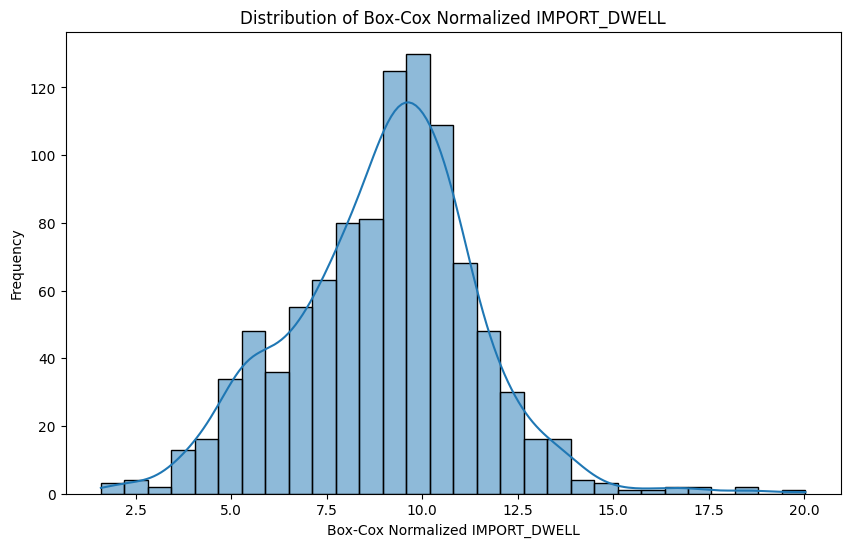

In [75]:
plt.figure(figsize=(10, 6))
sns.histplot(shipment_df['IMPORT_DWELL_SCALED'], kde=True, bins=30)
plt.title('Distribution of Box-Cox Normalized IMPORT_DWELL')
plt.xlabel('Box-Cox Normalized IMPORT_DWELL')
plt.ylabel('Frequency')
plt.show()

In [76]:
shipment_df['IMPORT_DWELL_SCALED'].describe()

count    993.000000
mean       8.999691
std        2.412559
min        1.589656
25%        7.539796
50%        9.183295
75%       10.537217
max       20.029127
Name: IMPORT_DWELL_SCALED, dtype: float64

In [77]:
# Shapiro–Wilk test normality test for subset of dwell
stat, p = shapiro(shipment_df['IMPORT_DWELL_SCALED'])
print("Stats=",stat,"P_Value=",p)
# interpret
alpha = 0.05
if p > alpha:
    print('Data follows Normal Distribution (Accept H0)')
else:
    print('Data does not follow Normal Distribution (Reject H0)')

Stats= 0.9858791828155518 P_Value= 3.372998591544274e-08
Data does not follow Normal Distribution (Reject H0)


In [78]:
shipment_df['weight_uom'].unique()

array([nan, 'KG'], dtype=object)

In [79]:
shipment_df['HAZMAT'].unique()

array(['N', nan], dtype=object)

In [80]:
shipment_df['HAZMAT'] = shipment_df['HAZMAT'].apply(lambda x: 0 if x == 'N' else 1)

In [81]:
shipment_df['HAZMAT'].value_counts()

0    791
1    202
Name: HAZMAT, dtype: int64

C:\Users\sneha.priya\AppData\Local\Temp\ipykernel_21272\402351969.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HAZMAT', y='IMPORT_DWELL_SCALED', data=shipment_df,palette='Set2')


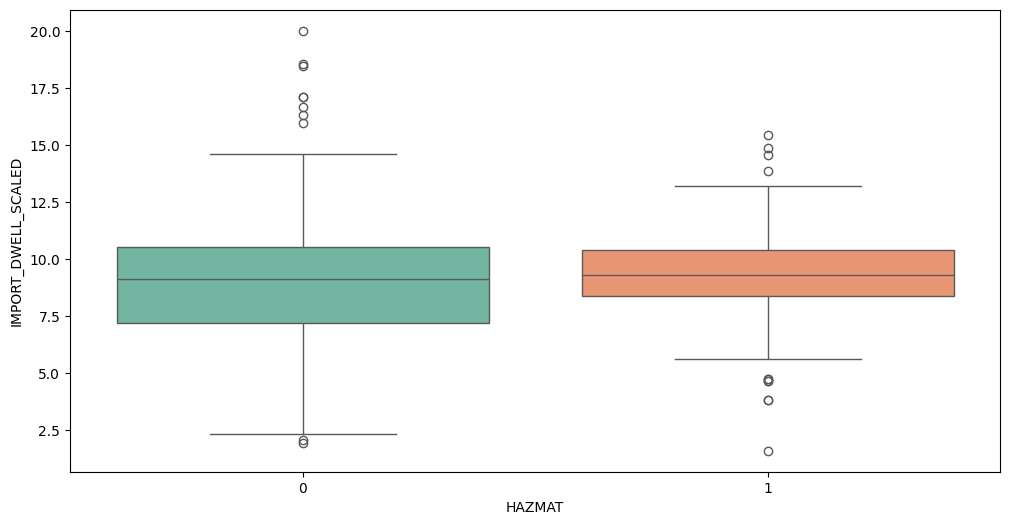

In [82]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='HAZMAT', y='IMPORT_DWELL_SCALED', data=shipment_df,palette='Set2')
plt.show()

In [83]:
group1 = shipment_df[shipment_df['HAZMAT'] == 0]['IMPORT_DWELL_SCALED']
group2 = shipment_df[shipment_df['HAZMAT'] == 1]['IMPORT_DWELL_SCALED']

stat, p = mannwhitneyu(group1, group2, alternative='two-sided')

print(f'Mann-Whitney U test statistic: {stat}')
print(f'P-value: {p}')
p_value = 0.05
if p<p_value:
    print("We reject the null hypothesis; there is a statistically significant difference in import dwell times between the two groups.")
else: 
    print("We accept the null hypothesis")

Mann-Whitney U test statistic: 72135.5
P-value: 0.03303581647036623
We reject the null hypothesis; there is a statistically significant difference in import dwell times between the two groups.


In [84]:
group1

0      5.581219
1      7.200192
2      8.749410
3      7.999180
4      6.122734
         ...   
988    6.836331
989    6.153746
990    7.505405
991    4.624793
992    4.509972
Name: IMPORT_DWELL_SCALED, Length: 791, dtype: float64

In [85]:
shipment_df.columns

Index(['SHIPMENTID', 'VESSEL', 'IMO', 'VOYAGE#', 'ORIGIN_PORT',
       'DESTINATION_PORT', 'ARRIVAL_TIME', 'GATEOUT_TIME', 'EQUIPMENTTYPECODE',
       'HAZMAT', 'GROSS_WEIGHT', 'weight_uom', 'IMPORT_DWELL',
       'IMPORT_DWELL_MINMAX', 'LOG_TRANSFORM', 'SQRT_TRANSFORM',
       'IMPORT_DWELL_SCALED', 'YEOJOHNSON_TRANSFORM', 'Z_Score'],
      dtype='object')

In [86]:
shipment_df.drop(['weight_uom'],axis=1,inplace=True)

In [87]:
shipment_df['EQUIPMENTTYPECODE'].isna().sum()

4

In [88]:
shipment_df = shipment_df.dropna(subset=['EQUIPMENTTYPECODE'])

In [89]:
shipment_df['EQUIPMENTTYPECODE'].isna().sum()

0

In [90]:
shipment_df.drop(['GROSS_WEIGHT'],axis=1,inplace=True)

In [91]:
shipment_df['20_ft'] = shipment_df['EQUIPMENTTYPECODE'].apply(lambda x: 1 if x.startswith('2') else 0)
shipment_df['40_ft'] = shipment_df['EQUIPMENTTYPECODE'].apply(lambda x: 1 if x.startswith('4') else 0)
shipment_df['RF'] = shipment_df['EQUIPMENTTYPECODE'].str.contains('RF').astype(int)

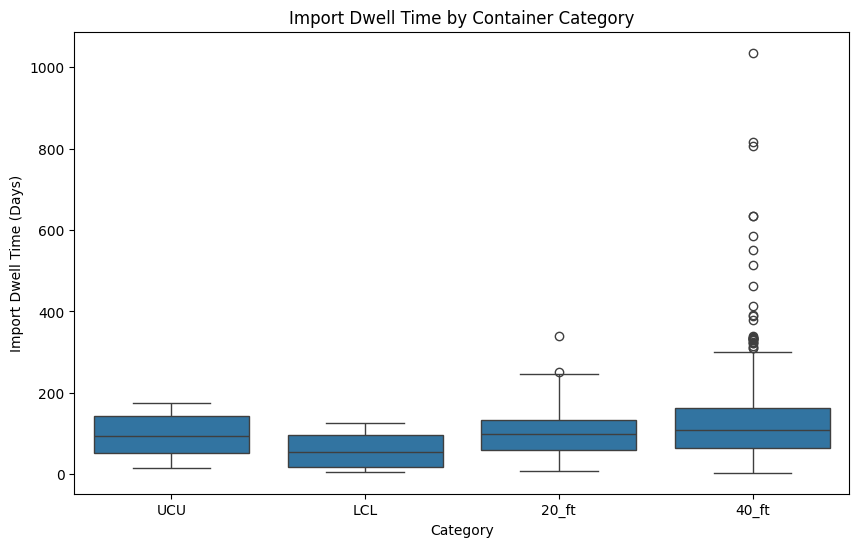

In [92]:
shipment_df['Container_Category'] = shipment_df.apply(lambda x: 'UCU' if x['EQUIPMENTTYPECODE'] == 'UCU' else 
                                               ('LCL' if x['EQUIPMENTTYPECODE'] == 'LCL' else
                                                ('20_ft' if x['20_ft'] == 1 else '40_ft')), axis=1)

# Selecting only the relevant rows for comparison (ignoring rows that do not fall into the specific categories)
relevant_categories = ['UCU', 'LCL', '20_ft', '40_ft']
df_filtered = shipment_df[shipment_df['Container_Category'].isin(relevant_categories)]

# Plotting box plots for 'IMPORT_DWELL' across the filtered categories
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='Container_Category', y='IMPORT_DWELL', order=['UCU', 'LCL', '20_ft', '40_ft'])
plt.title('Import Dwell Time by Container Category')
plt.xlabel('Category')
plt.ylabel('Import Dwell Time (Days)')
plt.show()

C:\Users\sneha.priya\AppData\Local\Temp\ipykernel_21272\2786464653.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


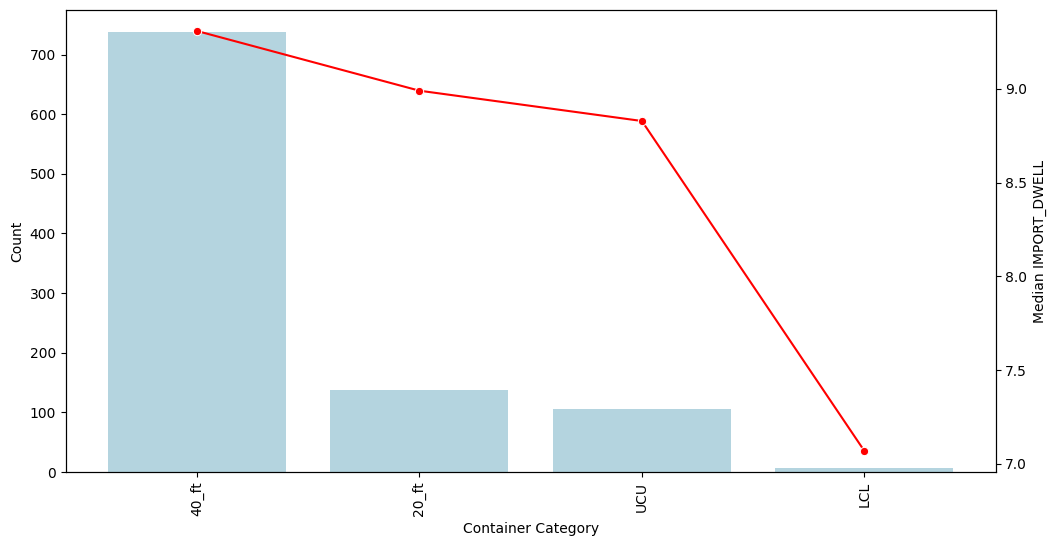

In [93]:
# Calculate median and count for each 'EQUIPMENTTYPECODE'
container_category_stats = shipment_df.groupby('Container_Category')['IMPORT_DWELL_SCALED'].agg(['median', 'count']).reset_index()
# Sort the dataframe based on count to have a better visualization
container_category_stats = container_category_stats.sort_values(by='count', ascending=False)

# Plotting the medians and counts
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for counts
count_plot = sns.barplot(x='Container_Category', y='count', data=container_category_stats, color='lightblue', ax=ax1)
ax1.set_xlabel('Container Category')
ax1.set_ylabel('Count')
ax1.tick_params(axis='y')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Creating a secondary y-axis for median dwell times
ax2 = ax1.twinx()

# Line plot for medians
median_plot = sns.lineplot(x='Container_Category', y='median', data=container_category_stats, sort=False, marker='o', ax=ax2, color='red')
ax2.set_ylabel('Median IMPORT_DWELL')

# Show the plot
plt.show()

In [94]:
# Remove rows where 'EQUIPMENTTYPECODE' is 'LCL'
shipment_df = shipment_df[shipment_df['EQUIPMENTTYPECODE'] != 'LCL']

# If 'Container_Category' column exists and needs to be updated without 'LCL'
if 'Container_Category' in shipment_df.columns:
    # Update 'Container_Category' column, setting 'UCU' to '20_ft'
    shipment_df.loc[shipment_df['EQUIPMENTTYPECODE'] == 'UCU', 'Container_Category'] = '20_ft'


In [95]:
shipment_df['Container_Size'] = shipment_df['40_ft'].apply(lambda x: 1 if x == 1 else 0)


In [96]:
shipment_df.drop(['20_ft', '40_ft'], axis=1, inplace=True)

In [97]:
shipment_df.head()

,SHIPMENTID,VESSEL,IMO,VOYAGE#,ORIGIN_PORT,DESTINATION_PORT,ARRIVAL_TIME,GATEOUT_TIME,EQUIPMENTTYPECODE,HAZMAT,IMPORT_DWELL,IMPORT_DWELL_MINMAX,LOG_TRANSFORM,SQRT_TRANSFORM,IMPORT_DWELL_SCALED,YEOJOHNSON_TRANSFORM,Z_Score,RF,Container_Category,Container_Size
0,1,BELLAVIA,9290440,003E,NAGOYA,TACOMA,2019-08-28 06:30:00,2019-08-29 13:11:00,UCU,0,30.683333,0.026077,3.423720,5.539254,5.581219,5.527924,-0.991588,0,20_ft,0
1,13,BELLAVIA,9290440,003E,TOKYO,TACOMA,2019-08-28 06:30:00,2019-08-30 14:30:00,UCU,0,56.000000,0.050605,4.025352,7.483315,7.200192,7.048436,-0.704320,0,20_ft,0
2,1079,SOUTHAMPTON EXPRESS,9447885,002E,HONG KONG,NEW YORK,2019-09-22 10:48:00,2019-09-26 06:55:00,UCU,0,92.116667,0.085595,4.523056,9.597743,8.749410,8.504848,-0.294504,0,20_ft,0
3,1080,SOUTHAMPTON EXPRESS,9447885,002E,HONG KONG,NEW YORK,2019-09-22 10:48:00,2019-09-25 11:47:00,UCU,0,72.983333,0.067059,4.290231,8.543028,7.999180,7.799721,-0.511610,0,20_ft,0
4,1149,MOL MOTIVATOR,9475624,048E,SHANGHAI,CHARLESTON,2019-09-24 02:25:00,2019-09-25 16:21:00,UCU,0,37.933333,0.033101,3.635830,6.159004,6.122734,6.035871,-0.909323,0,20_ft,0


In [98]:
shipment_df.groupby('Container_Size')['IMPORT_DWELL_SCALED'].describe()

,count,mean,std,min,25%,50%,75%,max
Container_Size,,,,,,,,
0,247.0,8.560096,2.050457,2.499161,7.149829,8.976328,10.238879,13.939709
1,735.0,9.193278,2.475036,1.589656,7.659102,9.308009,10.744716,20.029127


In [99]:
dwell_20_ft = shipment_df[shipment_df['Container_Size'] == 0]['IMPORT_DWELL_SCALED']
dwell_40_ft = shipment_df[shipment_df['Container_Size'] == 1]['IMPORT_DWELL_SCALED']

# Perform Mann-Whitney U test
u_stat, p_val = mannwhitneyu(dwell_20_ft, dwell_40_ft)
print(f'Mann-Whitney U statistic: {u_stat}, P-value: {p_val}')

Mann-Whitney U statistic: 77795.5, P-value: 0.0007655580490759269


In [100]:
shipment_df.head()

,SHIPMENTID,VESSEL,IMO,VOYAGE#,ORIGIN_PORT,DESTINATION_PORT,ARRIVAL_TIME,GATEOUT_TIME,EQUIPMENTTYPECODE,HAZMAT,IMPORT_DWELL,IMPORT_DWELL_MINMAX,LOG_TRANSFORM,SQRT_TRANSFORM,IMPORT_DWELL_SCALED,YEOJOHNSON_TRANSFORM,Z_Score,RF,Container_Category,Container_Size
0,1,BELLAVIA,9290440,003E,NAGOYA,TACOMA,2019-08-28 06:30:00,2019-08-29 13:11:00,UCU,0,30.683333,0.026077,3.423720,5.539254,5.581219,5.527924,-0.991588,0,20_ft,0
1,13,BELLAVIA,9290440,003E,TOKYO,TACOMA,2019-08-28 06:30:00,2019-08-30 14:30:00,UCU,0,56.000000,0.050605,4.025352,7.483315,7.200192,7.048436,-0.704320,0,20_ft,0
2,1079,SOUTHAMPTON EXPRESS,9447885,002E,HONG KONG,NEW YORK,2019-09-22 10:48:00,2019-09-26 06:55:00,UCU,0,92.116667,0.085595,4.523056,9.597743,8.749410,8.504848,-0.294504,0,20_ft,0
3,1080,SOUTHAMPTON EXPRESS,9447885,002E,HONG KONG,NEW YORK,2019-09-22 10:48:00,2019-09-25 11:47:00,UCU,0,72.983333,0.067059,4.290231,8.543028,7.999180,7.799721,-0.511610,0,20_ft,0
4,1149,MOL MOTIVATOR,9475624,048E,SHANGHAI,CHARLESTON,2019-09-24 02:25:00,2019-09-25 16:21:00,UCU,0,37.933333,0.033101,3.635830,6.159004,6.122734,6.035871,-0.909323,0,20_ft,0


In [101]:
shipment_df['ARRIVAL_DAY_OF_WEEK'] = shipment_df['ARRIVAL_TIME'].dt.dayofweek

In [102]:
shipment_df['IS_WEEKEND'] = shipment_df['ARRIVAL_DAY_OF_WEEK'].apply(lambda x: 1 if x >= 5 else 0)

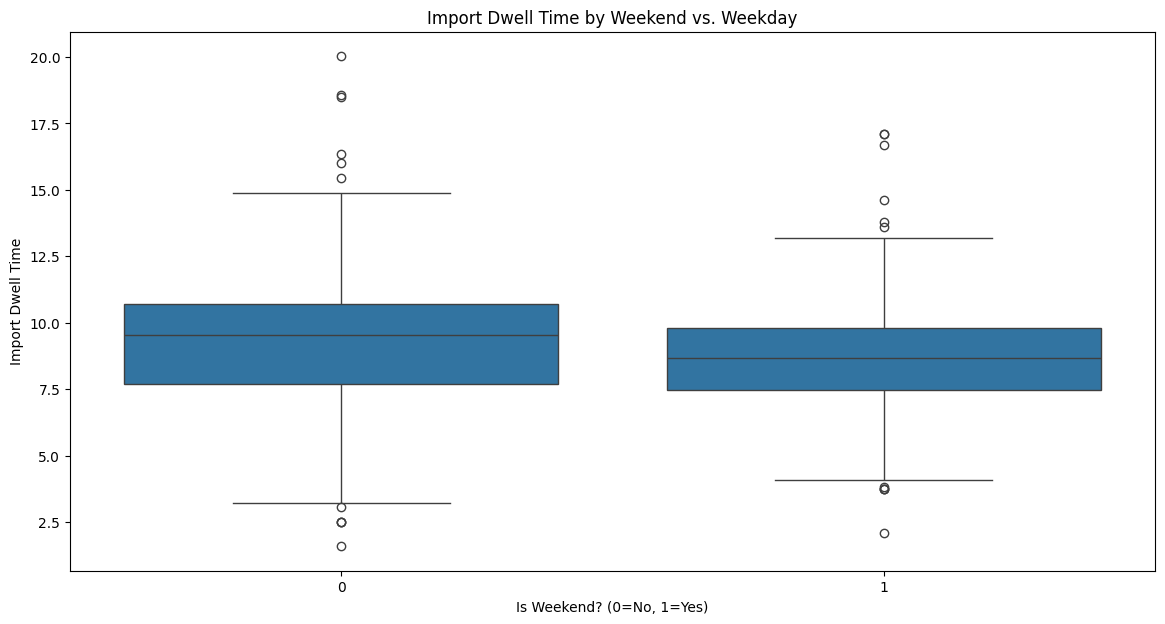

In [103]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='IS_WEEKEND', y='IMPORT_DWELL_SCALED', data=shipment_df)
plt.title('Import Dwell Time by Weekend vs. Weekday')
plt.xlabel('Is Weekend? (0=No, 1=Yes)')
plt.ylabel('Import Dwell Time')
plt.show()

In [104]:
weekday_dwell = shipment_df[shipment_df['IS_WEEKEND'] == 0]['IMPORT_DWELL_SCALED']
weekend_dwell = shipment_df[shipment_df['IS_WEEKEND'] == 1]['IMPORT_DWELL_SCALED']
stat, p = mannwhitneyu(weekday_dwell, weekend_dwell, alternative='two-sided')
stat, p

(107828.5, 7.05098354412231e-06)

In [105]:
shipment_df.columns

Index(['SHIPMENTID', 'VESSEL', 'IMO', 'VOYAGE#', 'ORIGIN_PORT',
       'DESTINATION_PORT', 'ARRIVAL_TIME', 'GATEOUT_TIME', 'EQUIPMENTTYPECODE',
       'HAZMAT', 'IMPORT_DWELL', 'IMPORT_DWELL_MINMAX', 'LOG_TRANSFORM',
       'SQRT_TRANSFORM', 'IMPORT_DWELL_SCALED', 'YEOJOHNSON_TRANSFORM',
       'Z_Score', 'RF', 'Container_Category', 'Container_Size',
       'ARRIVAL_DAY_OF_WEEK', 'IS_WEEKEND'],
      dtype='object')

In [106]:
data_1 = shipment_df[['VESSEL', 'IMO', 'ORIGIN_PORT',
       'DESTINATION_PORT', 'ARRIVAL_TIME', 'GATEOUT_TIME',
       'HAZMAT', 'IMPORT_DWELL','IMPORT_DWELL_SCALED','RF', 'Container_Size', 'IS_WEEKEND']]

In [107]:
data_1.to_csv('shipment_cleaned.csv')